Dataset obtained from kaggle - https://www.kaggle.com/johndasilva/diabetes

#### READING AND UNDERSTANDING THE DATA

In [236]:
#Importing all required libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
# Importing Random Forest
from sklearn.ensemble import RandomForestClassifier
# Importing modules for cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

#Importing Library to check confusion matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve, auc, roc_auc_score, roc_curve

In [237]:
#Reading the csv file into a dataframe
db=pd.read_csv("diabetes_dataset.csv")
db.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [238]:
#Checking the shape of the dataframe
db.shape

(2000, 9)

In [239]:
#data summary
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
Pregnancies                 2000 non-null int64
Glucose                     2000 non-null int64
BloodPressure               2000 non-null int64
SkinThickness               2000 non-null int64
Insulin                     2000 non-null int64
BMI                         2000 non-null float64
DiabetesPedigreeFunction    2000 non-null float64
Age                         2000 non-null int64
Outcome                     2000 non-null int64
dtypes: float64(2), int64(7)
memory usage: 140.7 KB


In [240]:
#data statistics
db.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [241]:
#Checking for null values in our dataset
db.isnull().any().sum()

0

#### VISUALIZING THE DATA

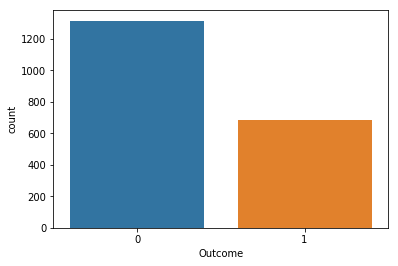

In [242]:
#Visualizing the target column
sns.countplot(x=db.Outcome)

In [243]:
outcomes=db.Outcome.value_counts()
Nodiabetes=outcomes[0]/db['Outcome'].count()*100
Diabetes=outcomes[1]/db['Outcome'].count()*100

In [244]:
print(Nodiabetes)
print(Diabetes)

65.8
34.2


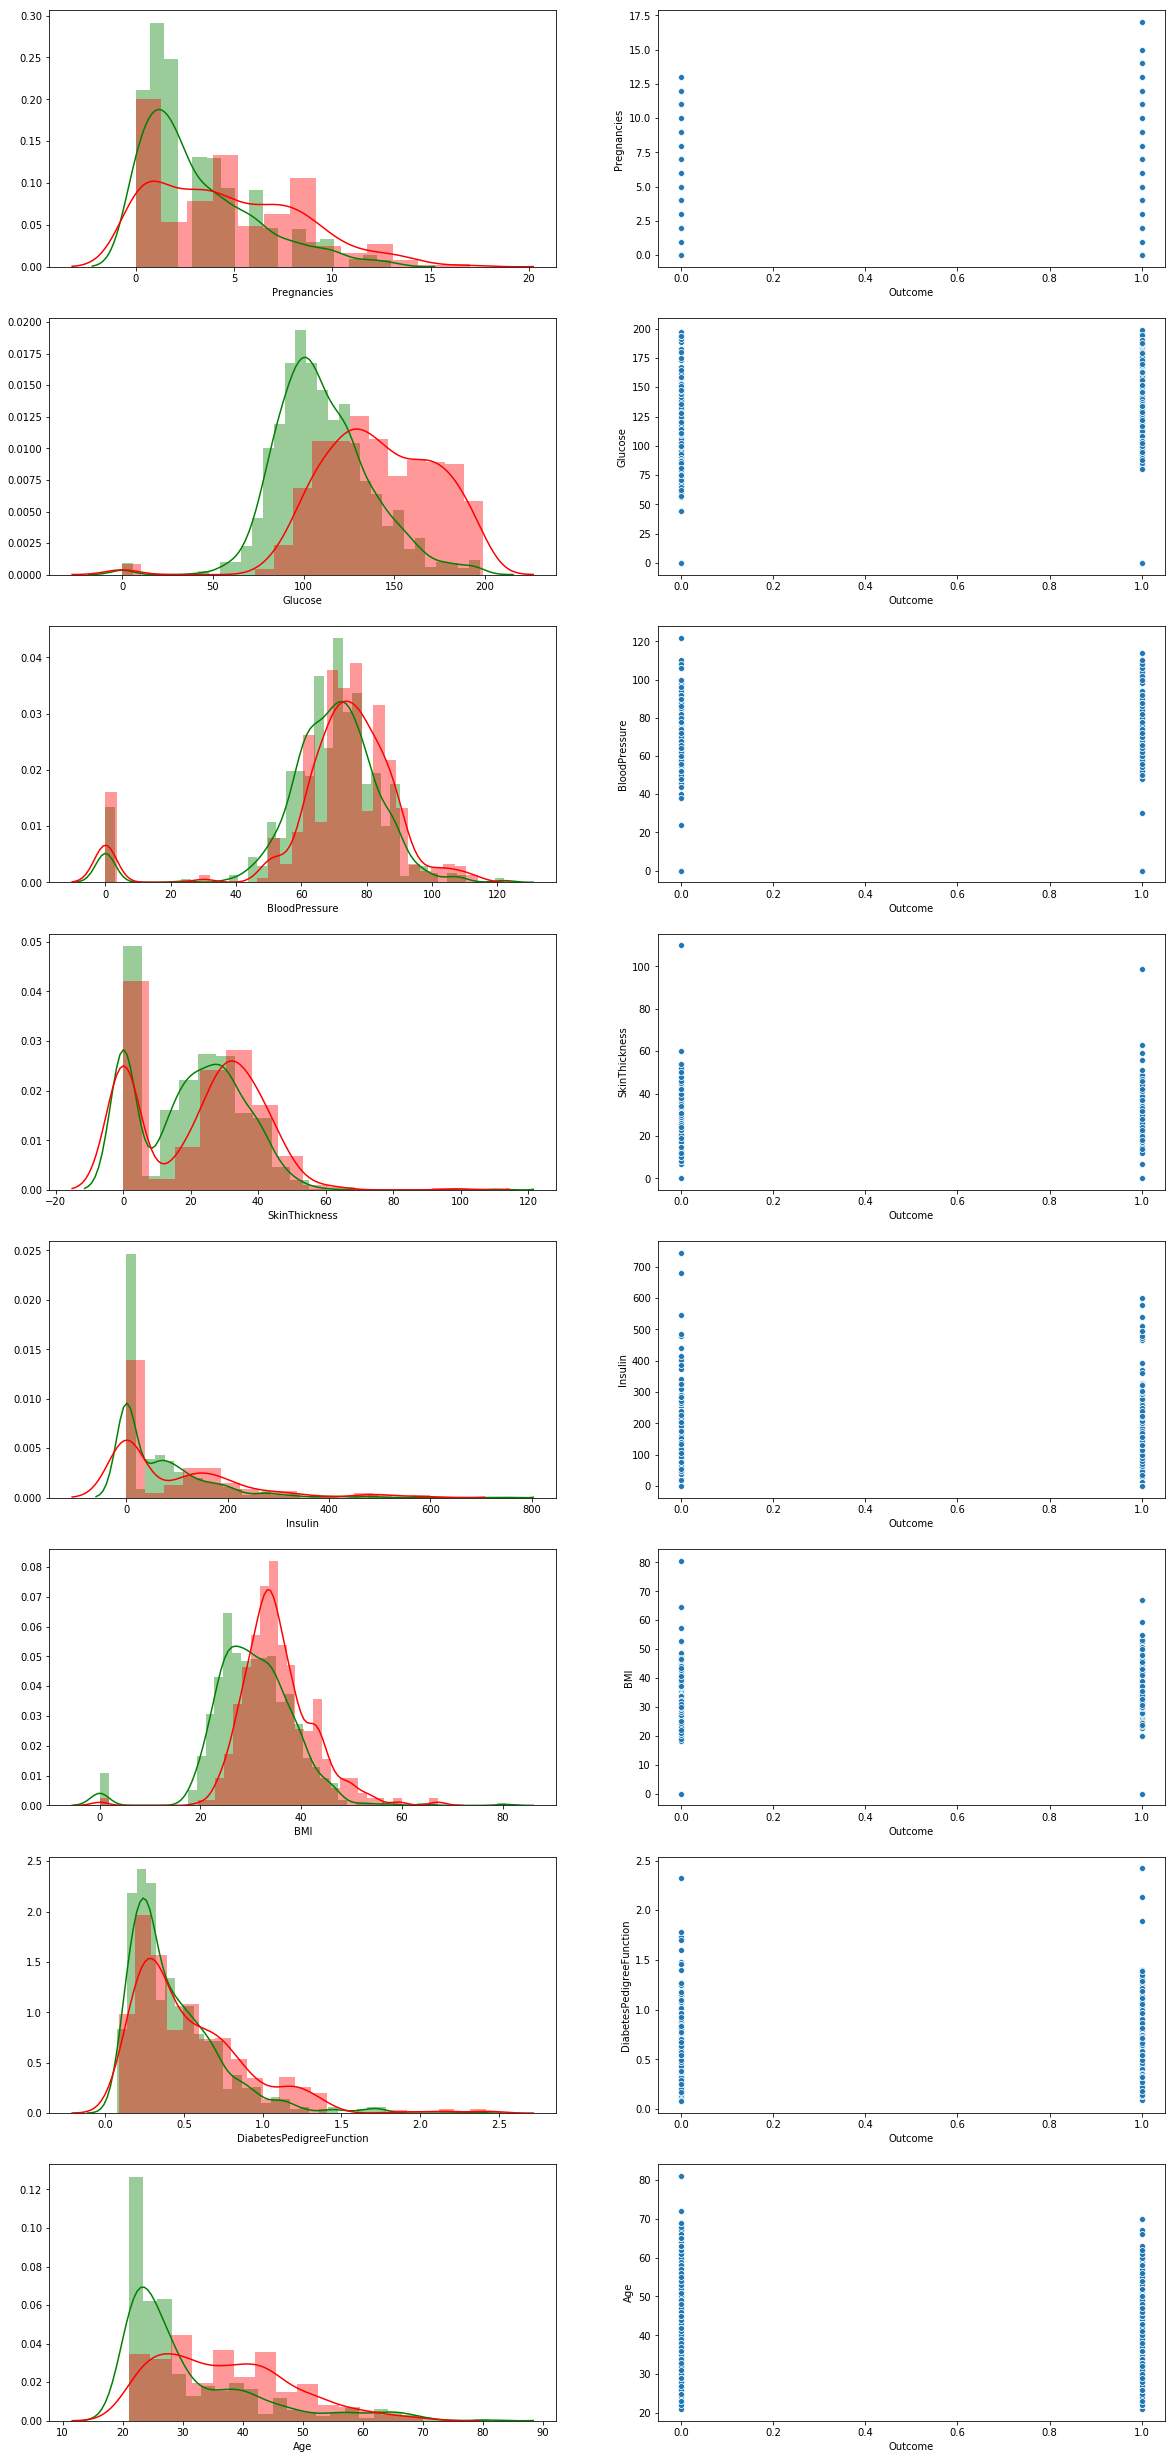

In [245]:
#Plotting the data with respect to target columns
fig=plt.figure(figsize=(20,50))

ax1=plt.subplot(9,2,1)
sns.distplot(db['Pregnancies'][db.Outcome==0],ax=ax1,color='green')
sns.distplot(db['Pregnancies'][db.Outcome==1],ax=ax1,color='red')
ax2=plt.subplot(9,2,2)
sns.scatterplot(x=db.Outcome,ax=ax2,y=db['Pregnancies'])

ax3=plt.subplot(9,2,3)
sns.distplot(db['Glucose'][db.Outcome==0],ax=ax3,color='green')
sns.distplot(db['Glucose'][db.Outcome==1],ax=ax3,color='red')
ax4=plt.subplot(9,2,4)
sns.scatterplot(x=db.Outcome,ax=ax4,y=db['Glucose'])

ax5=plt.subplot(9,2,5)
sns.distplot(db['BloodPressure'][db.Outcome==0],ax=ax5,color='green')
sns.distplot(db['BloodPressure'][db.Outcome==1],ax=ax5,color='red')
ax6=plt.subplot(9,2,6)
sns.scatterplot(x=db.Outcome,ax=ax6,y=db['BloodPressure'])

ax7=plt.subplot(9,2,7)
sns.distplot(db['SkinThickness'][db.Outcome==0],ax=ax7,color='green')
sns.distplot(db['SkinThickness'][db.Outcome==1],ax=ax7,color='red')
ax8=plt.subplot(9,2,8)
sns.scatterplot(x=db.Outcome,ax=ax8,y=db['SkinThickness'])

ax9=plt.subplot(9,2,9)
sns.distplot(db['Insulin'][db.Outcome==0],ax=ax9,color='green')
sns.distplot(db['Insulin'][db.Outcome==1],ax=ax9,color='red')
ax10=plt.subplot(9,2,10)
sns.scatterplot(x=db.Outcome,ax=ax10,y=db['Insulin'])

ax11=plt.subplot(9,2,11)
sns.distplot(db['BMI'][db.Outcome==0],ax=ax11,color='green')
sns.distplot(db['BMI'][db.Outcome==1],ax=ax11,color='red')
ax12=plt.subplot(9,2,12)
sns.scatterplot(x=db.Outcome,ax=ax12,y=db['BMI'])


ax13=plt.subplot(9,2,13)
sns.distplot(db['DiabetesPedigreeFunction'][db.Outcome==0],ax=ax13,color='green')
sns.distplot(db['DiabetesPedigreeFunction'][db.Outcome==1],ax=ax13,color='red')
ax14=plt.subplot(9,2,14)
sns.scatterplot(x=db.Outcome,ax=ax14,y=db['DiabetesPedigreeFunction'])

ax15=plt.subplot(9,2,15)
sns.distplot(db['Age'][db.Outcome==0],ax=ax15,color='green')
sns.distplot(db['Age'][db.Outcome==1],ax=ax15,color='red')
ax16=plt.subplot(9,2,16)
sns.scatterplot(x=db.Outcome,ax=ax16,y=db['Age'])

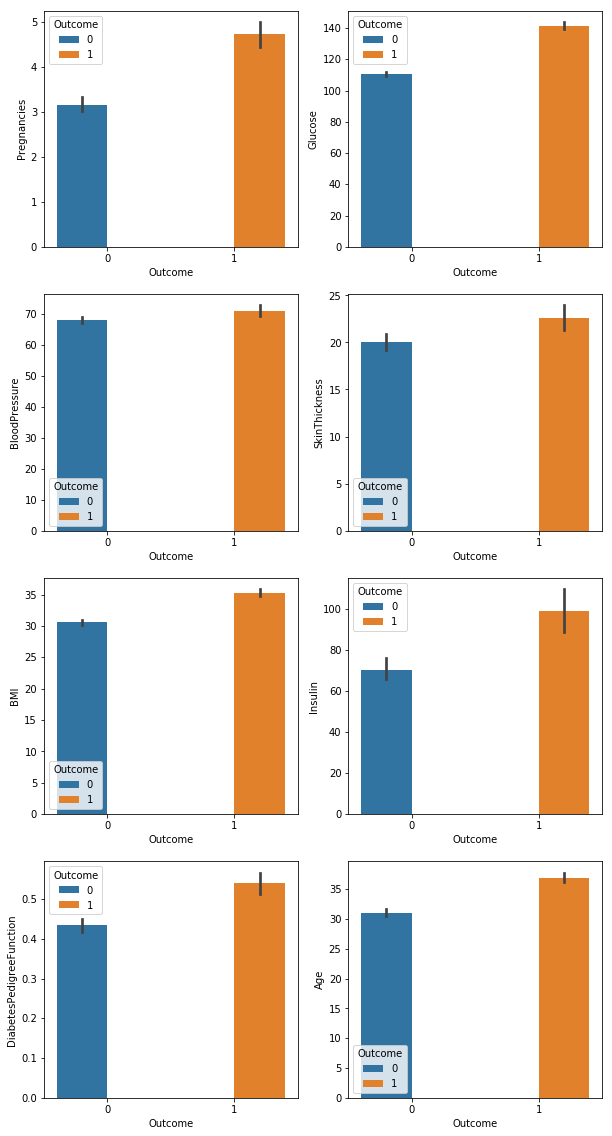

In [246]:
plt.figure(figsize=(10,20))
plt.subplot(4,2,1)
sns.barplot(x='Outcome',y='Pregnancies',data=db,hue="Outcome")
plt.subplot(4,2,2)
sns.barplot(x='Outcome',y='Glucose',data=db,hue="Outcome")
plt.subplot(4,2,3)
sns.barplot(x='Outcome',y='BloodPressure',data=db,hue="Outcome")
plt.subplot(4,2,4)
sns.barplot(x='Outcome',y='SkinThickness',data=db,hue="Outcome")
plt.subplot(4,2,5)
sns.barplot(x='Outcome',y='BMI',data=db,hue="Outcome")
plt.subplot(4,2,6)
sns.barplot(x='Outcome',y='Insulin',data=db,hue="Outcome")
plt.subplot(4,2,7)
sns.barplot(x='Outcome',y='DiabetesPedigreeFunction',data=db,hue="Outcome")
plt.subplot(4,2,8)
sns.barplot(x='Outcome',y='Age',data=db,hue="Outcome")

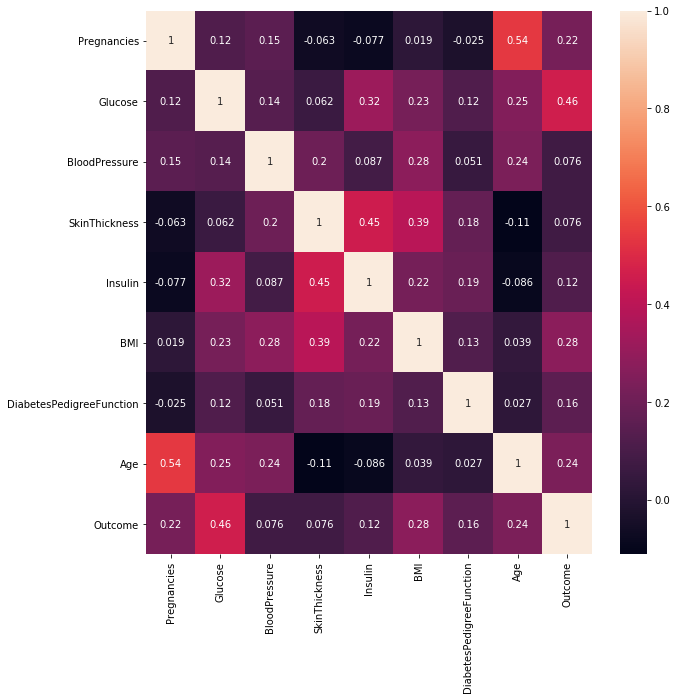

In [247]:
corrmat=db.corr()
fig=plt.figure(figsize=(10,10))
sns.heatmap(corrmat,annot=True)

#### DATA PREPARATION

In [248]:
db[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=db[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)

In [249]:
db.isnull().sum()

Pregnancies                   0
Glucose                      13
BloodPressure                90
SkinThickness               573
Insulin                     956
BMI                          28
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [250]:
db.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,1987.000000,1910.000000,1427.000000,1044.000000,1972.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.975340,72.403665,29.341275,153.743295,32.650101,0.470930,33.090500,0.342000
std,3.306063,30.632883,12.227968,10.802278,111.273639,7.241027,0.323553,11.786423,0.474498
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.750000,27.500000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,126.000000,32.400000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [251]:
#Filling in the null values with mean/median
db['Glucose'].fillna(db['Glucose'].median(),inplace=True)
db['BloodPressure'].fillna(db['BloodPressure'].median(),inplace=True)
db['SkinThickness'].fillna(db['SkinThickness'].mean(),inplace=True)
db['Insulin'].fillna(db['Insulin'].median(),inplace=True)
db['BMI'].fillna(db['BMI'].median(),inplace=True)

In [252]:
#Checking for null values post null value treatment
db.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [253]:
#Splitting into X and y
y=db['Outcome']
X=db.drop(['Outcome'],axis=1)

In [254]:
#Splitting data into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1500, 8) (500, 8) (1500,) (500,)


In [255]:
#Scaling the data 
scaler=StandardScaler()
cols=X_train.columns
X_train[cols]=scaler.fit_transform(X_train[cols])
X_test[cols]=scaler.transform(X_test[cols])

#### MODEL BUILDING

1. LOGISTIC REGRESSION

In [256]:
logistic=LogisticRegression()

logistic.fit(X_train,y_train)

LogisticRegression()

In [257]:
# testing precsion and recall on train set
y_train_pred = logistic.predict(X_train)
print('\n--------- Confusion matrix ---------')
print(confusion_matrix(y_train, y_train_pred))
print('\n--------- Classification report ---------')
print(classification_report(y_train, y_train_pred))


--------- Confusion matrix ---------
[[876 120]
 [237 267]]

--------- Classification report ---------
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       996
           1       0.69      0.53      0.60       504

    accuracy                           0.76      1500
   macro avg       0.74      0.70      0.72      1500
weighted avg       0.75      0.76      0.75      1500



In [258]:
# testing precsion and recall on test set
y_test_pred = logistic.predict(X_test)
print('\n--------- Confusion matrix ---------')
print(confusion_matrix(y_test, y_test_pred))
print('\n--------- Classification report ---------')
print(classification_report(y_test, y_test_pred))


--------- Confusion matrix ---------
[[288  32]
 [ 76 104]]

--------- Classification report ---------
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       320
           1       0.76      0.58      0.66       180

    accuracy                           0.78       500
   macro avg       0.78      0.74      0.75       500
weighted avg       0.78      0.78      0.78       500



In [259]:
#Creating an instance
logistic=LogisticRegression()

#Defining Parameters
params={"penalty":['l1', 'l2','elasticnet'],
        'C':[0.001, 0.01, 0.05, 0.1, 0.5,0.7, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,100],
       'solver':['newton-cg', 'lbfgs','liblinear’, ‘sag’, ‘saga'],
       'class_weight':['balanced']}


# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

# create gridsearch object
model = GridSearchCV(estimator=logistic, 
                     cv=folds, 
                     param_grid=params, 
                     return_train_score=True, 
                     scoring='recall', 
                     n_jobs=-1, 
                     verbose=1)

#Fitting the model on the training set
model.fit(X_train, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed:    6.7s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.05, 0.1, 0.5, 0.7, 0.9, 1, 2, 3,
                               4, 5, 6, 7, 8, 9, 10, 100],
                         'class_weight': ['balanced'],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs',
                                    'liblinear’, ‘sag’, ‘saga']},
             return_train_score=True, scoring='recall', verbose=1)

In [260]:
#Saving the cross validation results in a dataframe
log_results=pd.DataFrame(model.cv_results_)
log_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_class_weight,param_penalty,param_solver,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.000000,0.000000,0.000000,0.000000,0.001,balanced,l1,newton-cg,"{'C': 0.001, 'class_weight': 'balanced', 'pena...",NaN,...,NaN,NaN,41,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.006248,0.007652,0.000000,0.000000,0.001,balanced,l1,lbfgs,"{'C': 0.001, 'class_weight': 'balanced', 'pena...",NaN,...,NaN,NaN,111,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.003125,0.006250,0.000000,0.000000,0.001,balanced,l1,"liblinear’, ‘sag’, ‘saga","{'C': 0.001, 'class_weight': 'balanced', 'pena...",NaN,...,NaN,NaN,112,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.024994,0.007652,0.009373,0.007653,0.001,balanced,l2,newton-cg,"{'C': 0.001, 'class_weight': 'balanced', 'pena...",0.66,...,0.674574,0.042403,35,0.688119,0.672457,0.679901,0.669975,0.682382,0.678567,0.006614
4,0.024994,0.012497,0.000000,0.000000,0.001,balanced,l2,lbfgs,"{'C': 0.001, 'class_weight': 'balanced', 'pena...",0.66,...,0.674574,0.042403,35,0.688119,0.672457,0.679901,0.669975,0.682382,0.678567,0.006614


In [261]:
# Checking the best hyperparamters and best score
print("Best Hyperparamters: ", model.best_params_)
print("Best score: ",model.best_score_)

Best Hyperparamters:  {'C': 0.5, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'newton-cg'}
Best score:  0.7024158415841584


In [262]:
#Building model with best parameters
logistic=LogisticRegression(C=0.5,verbose=1,random_state=42,penalty='l2',class_weight='balanced',solver='newton-cg')
logistic.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(C=0.5, class_weight='balanced', random_state=42,
                   solver='newton-cg', verbose=1)


Area Under Curve for train is 0.8372

--------- Confusion matrix ---------
[[767 229]
 [143 361]]

--------- Classification report ---------
              precision    recall  f1-score   support

           0       0.84      0.77      0.80       996
           1       0.61      0.72      0.66       504

    accuracy                           0.75      1500
   macro avg       0.73      0.74      0.73      1500
weighted avg       0.77      0.75      0.76      1500



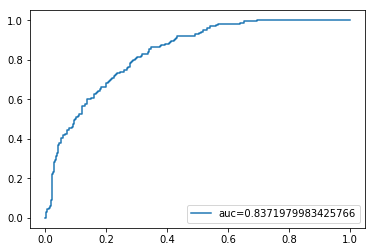

In [263]:
#Printing all Train results
cols=X_train.columns
y_train_pred = logistic.predict(X_train[cols])
train_auc = roc_auc_score(y_train, logistic.predict_proba(X_train[cols])[:,1])
print('\nArea Under Curve for train is {}'.format(round(train_auc,4)))
print('\n--------- Confusion matrix ---------')
print(confusion_matrix(y_train, y_train_pred))
print('\n--------- Classification report ---------')
print(classification_report(y_train, y_train_pred))
fpr, tpr, thresholds = metrics.roc_curve(y_train, logistic.predict_proba(X_train[cols])[:,1])
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr,tpr,label="auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()


Area Under curve for test is 0.8519

--------- Confusion matrix ---------
[[245  75]
 [ 41 139]]

--------- Classification report ---------
              precision    recall  f1-score   support

           0       0.86      0.77      0.81       320
           1       0.65      0.77      0.71       180

    accuracy                           0.77       500
   macro avg       0.75      0.77      0.76       500
weighted avg       0.78      0.77      0.77       500



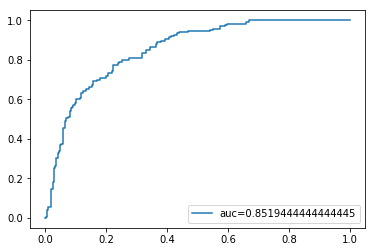

In [264]:
# predict churn on test data
y_test_pred = logistic.predict(X_test)
#printing all test results
test_auc = roc_auc_score(y_test, logistic.predict_proba(X_test[cols])[:,1])
print('\nArea Under curve for test is {}'.format(round(test_auc, 4)))
print('\n--------- Confusion matrix ---------')
print(confusion_matrix(y_test, y_test_pred))
print('\n--------- Classification report ---------')
print(classification_report(y_test, y_test_pred))
fpr, tpr, thresholds = metrics.roc_curve(y_test, logistic.predict_proba(X_test[cols])[:,1])
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr,tpr,label="auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

2. SVM

In [265]:
svm=SVC()

svm.fit(X_train,y_train)

SVC()

In [266]:
# testing precsion and recall on train set
y_train_pred = svm.predict(X_train)
print('\n--------- Confusion matrix ---------')
print(confusion_matrix(y_train, y_train_pred))
print('\n--------- Classification report ---------')
print(classification_report(y_train, y_train_pred))


--------- Confusion matrix ---------
[[929  67]
 [161 343]]

--------- Classification report ---------
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       996
           1       0.84      0.68      0.75       504

    accuracy                           0.85      1500
   macro avg       0.84      0.81      0.82      1500
weighted avg       0.85      0.85      0.84      1500



In [267]:
# testing precsion and recall on test set
y_test_pred = svm.predict(X_test)
print('\n--------- Confusion matrix ---------')
print(confusion_matrix(y_test, y_test_pred))
print('\n--------- Classification report ---------')
print(classification_report(y_test, y_test_pred))


--------- Confusion matrix ---------
[[299  21]
 [ 56 124]]

--------- Classification report ---------
              precision    recall  f1-score   support

           0       0.84      0.93      0.89       320
           1       0.86      0.69      0.76       180

    accuracy                           0.85       500
   macro avg       0.85      0.81      0.82       500
weighted avg       0.85      0.85      0.84       500



In [268]:
svm=SVC()

params={"kernel":['linear', 'rbf'],'C':[0.1,1,10,100],
        "gamma":[0.1, 1, 10, 100]}


# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

# create gridsearch object
model = GridSearchCV(estimator=svm, 
                     cv=folds, 
                     param_grid=params, 
                     return_train_score=True, 
                     scoring='recall', 
                     n_jobs=-1, 
                     verbose=1)

model.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   25.0s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf']},
             return_train_score=True, scoring='recall', verbose=1)

In [269]:
# Checking the best hyperparamters and best score
print("Best Hyperparamters: ", model.best_params_)
print("Best score: ",model.best_score_)

Best Hyperparamters:  {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Best score:  0.8810099009900989


In [270]:
#Building model with best parameters
svm=SVC(C=10,verbose=1,random_state=42,gamma=1,kernel='rbf')
svm.fit(X_train,y_train)

[LibSVM]

SVC(C=10, gamma=1, random_state=42, verbose=1)

In [271]:
#Printing all Train results
cols=X_train.columns
y_train_pred = svm.predict(X_train[cols])
print('\n--------- Confusion matrix ---------')
print(confusion_matrix(y_train, y_train_pred))
print('\n--------- Classification report ---------')
print(classification_report(y_train, y_train_pred))


--------- Confusion matrix ---------
[[996   0]
 [  0 504]]

--------- Classification report ---------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       996
           1       1.00      1.00      1.00       504

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500



In [272]:
# testing precsion and recall on test set
y_test_pred = svm.predict(X_test)
print('\n--------- Confusion matrix ---------')
print(confusion_matrix(y_test, y_test_pred))
print('\n--------- Classification report ---------')
print(classification_report(y_test, y_test_pred))


--------- Confusion matrix ---------
[[313   7]
 [ 12 168]]

--------- Classification report ---------
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       320
           1       0.96      0.93      0.95       180

    accuracy                           0.96       500
   macro avg       0.96      0.96      0.96       500
weighted avg       0.96      0.96      0.96       500



3. RANDOM FOREST CLASSIFIER

In [273]:
# Building an initial Random Forest Classifier
forest = RandomForestClassifier(n_jobs=-1,random_state=42)

forest.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [275]:
forest.get_params(deep=True)

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [218]:
# testing precsion and recall on train set
y_train_pred = forest.predict(X_train)
print('\n--------- Confusion matrix ---------')
print(confusion_matrix(y_train, y_train_pred))
print('\n--------- Classification report ---------')
print(classification_report(y_train, y_train_pred))


--------- Confusion matrix ---------
[[996   0]
 [  0 504]]

--------- Classification report ---------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       996
           1       1.00      1.00      1.00       504

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500



In [219]:
# testing precsion and recall on test set
y_test_pred = forest.predict(X_test)
print('\n--------- Confusion matrix ---------')
print(confusion_matrix(y_test, y_test_pred))
print('\n--------- Classification report ---------')
print(classification_report(y_test, y_test_pred))


--------- Confusion matrix ---------
[[315   5]
 [  6 174]]

--------- Classification report ---------
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       320
           1       0.97      0.97      0.97       180

    accuracy                           0.98       500
   macro avg       0.98      0.98      0.98       500
weighted avg       0.98      0.98      0.98       500



In [276]:
#Initialising the model
forest=RandomForestClassifier()

#Parameters for tuning
n_estimators = [45,50,55,60,100]
max_depth = [27,28,29,30,31,32,33]
min_samples_split = [2,3,4,5,6]
min_samples_leaf = [1,2,3,4,5,6]
params={"n_estimators":n_estimators,"max_depth":max_depth,"min_samples_split":min_samples_split,"min_samples_leaf":min_samples_leaf}


# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

# create gridsearch object
model = GridSearchCV(estimator=forest, 
                     cv=folds, 
                     param_grid=params, 
                     return_train_score=True, 
                     scoring='recall', 
                     n_jobs=-1, 
                     verbose=1)

#Fitting the model on the train set
model.fit(X_train, y_train)

Fitting 5 folds for each of 1050 candidates, totalling 5250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   22.1s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   49.3s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 5250 out of 5250 | elapsed: 10.5min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [27, 28, 29, 30, 31, 32, 33],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [2, 3, 4, 5, 6],
                         'n_estimators': [45, 50, 55, 60, 100]},
             return_train_score=True, scoring='recall', verbose=1)

In [277]:
#Saving the cross validation results in a dataframe
rfc1_results=pd.DataFrame(model.cv_results_)
rfc1_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.265500,0.011677,0.015622,7.893059e-07,27,1,2,45,"{'max_depth': 27, 'min_samples_leaf': 1, 'min_...",0.95,...,0.926634,0.014660,40,1.000000,1.000000,1.0,1.0,1.0,1.000000,0.000000
1,0.283530,0.018469,0.020344,6.442550e-03,27,1,2,50,"{'max_depth': 27, 'min_samples_leaf': 1, 'min_...",0.96,...,0.932594,0.021039,15,0.997525,1.000000,1.0,1.0,1.0,0.999505,0.000990
2,0.322130,0.012821,0.019613,3.569755e-03,27,1,2,55,"{'max_depth': 27, 'min_samples_leaf': 1, 'min_...",0.98,...,0.930653,0.038550,21,1.000000,0.997519,1.0,1.0,1.0,0.999504,0.000993
3,0.448865,0.068051,0.022630,9.749266e-03,27,1,2,60,"{'max_depth': 27, 'min_samples_leaf': 1, 'min_...",0.95,...,0.936535,0.019332,7,1.000000,1.000000,1.0,1.0,1.0,1.000000,0.000000
4,0.725619,0.017126,0.038370,7.118857e-03,27,1,2,100,"{'max_depth': 27, 'min_samples_leaf': 1, 'min_...",0.98,...,0.948475,0.021083,1,1.000000,1.000000,1.0,1.0,1.0,1.000000,0.000000


In [278]:
#Checking the best hyperparameters and best score obtained through cross validation
print("Best Hyperparamters: ", model.best_params_)
print("Best score: ",model.best_score_)

Best Hyperparamters:  {'max_depth': 27, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best score:  0.9484752475247525


In [279]:
#Building final model with best hyperparamters
forest = RandomForestClassifier(n_estimators=100, max_depth=27,
                                min_samples_split=2, min_samples_leaf=1,random_state=42,
                                n_jobs=-1).fit(X_train, y_train)


Area Under Curve for train is 1.0

--------- Confusion matrix ---------
[[996   0]
 [  0 504]]

--------- Classification report ---------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       996
           1       1.00      1.00      1.00       504

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500



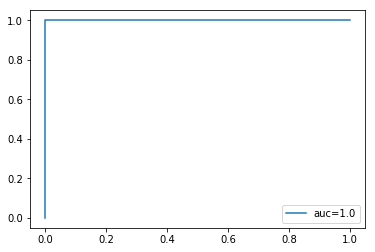

In [280]:
#printing train results
cols=X_train.columns
y_train_pred = forest.predict(X_train[cols])
train_auc = roc_auc_score(y_train, forest.predict_proba(X_train[cols])[:,1])
print('\nArea Under Curve for train is {}'.format(round(train_auc,4)))
print('\n--------- Confusion matrix ---------')
print(confusion_matrix(y_train, y_train_pred))
print('\n--------- Classification report ---------')
print(classification_report(y_train, y_train_pred))
fpr, tpr, thresholds = metrics.roc_curve(y_train, forest.predict_proba(X_train[cols])[:,1])
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr,tpr,label="auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()


Area Under curve for test is 0.9961

--------- Confusion matrix ---------
[[315   5]
 [  6 174]]

--------- Classification report ---------
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       320
           1       0.97      0.97      0.97       180

    accuracy                           0.98       500
   macro avg       0.98      0.98      0.98       500
weighted avg       0.98      0.98      0.98       500



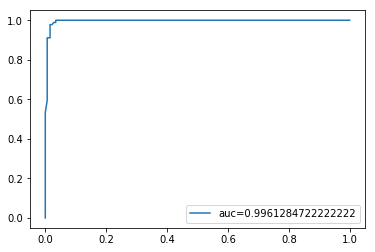

In [281]:
y_test_pred = forest.predict(X_test)

#printing all test results
test_auc = roc_auc_score(y_test, forest.predict_proba(X_test[cols])[:,1])
print('\nArea Under curve for test is {}'.format(round(test_auc, 4)))
print('\n--------- Confusion matrix ---------')
print(confusion_matrix(y_test, y_test_pred))
print('\n--------- Classification report ---------')
print(classification_report(y_test, y_test_pred))
fpr, tpr, thresholds = metrics.roc_curve(y_test, forest.predict_proba(X_test[cols])[:,1])
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr,tpr,label="auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

#### FUNCTION FOR PREDICTION

In [282]:
# Creating a function for prediction
def predict_diabetes(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age):
    preg = int(Pregnancies)
    glucose = float(Glucose)
    bp = float(BloodPressure)
    st = float(SkinThickness)
    insulin = float(Insulin)
    bmi = float(BMI)
    dpf = float(DPF)
    age = int(Age)

    x = [[preg, glucose, bp, st, insulin, bmi, dpf, age]]
    x = scaler.transform(x)

    return forest.predict(x)

In [284]:
# Prediction 1
# Input sequence: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age
prediction = predict_diabetes(2, 81, 72, 15, 76, 30.1, 0.547, 25)[0]
if prediction:
  print('You have diabetes.')
else:
  print("Great,You don't have diabetes.")

Great,You don't have diabetes.


In [289]:
# Prediction 2
# Input sequence: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age
prediction = predict_diabetes(1, 117, 88, 24, 145, 34.5, 0.403, 40)[0]
if prediction:
  print('You have diabetes.')
else:
  print("Great,You don't have diabetes.")

You have diabetes.
